##  A super-simple environment for trying out Q-learning
Marcus Frean

Reads in a grid-world (eg. Cliff.txt). Integers in this file denote
different types of site, which incur different rewards and successor
states. See below for what these 'Codes' mean.

Possible actions are north (0), south (1), east (2), and west (3).

The Q-learning algorithm is used to adapt Q-values, which start off
random and small.  After learning, the best policy based on the
learned Q-values is shown in white.

In [8]:
%matplotlib inline
import sys
import numpy as np
import numpy.random as rng
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # for the colormap
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [9]:
def doOneStep(r,c,Q):

    # Epsilon-greedy policy:
    if rng.random() > EPSILON: # be greedy w.r.t. current Q values
        localQs = Q[r,c,:]
        action = np.argmax(localQs)
        #print('yes ')
    else:   # this is the random exploration hack.
        #print('heck')
        action = rng.randint(4)   

    if action==0: new_r,new_c = r-1,c # north
    if action==1: new_r,new_c = r+1,c # south
    if action==2: new_r,new_c = r,c+1 # east
    if action==3: new_r,new_c = r,c-1 # west

    # If you arrive in a GOAL state, update Q[r,c] towards 0.
    if world[new_r,new_c] == GOAL:
        change = (0.0 + 0.0  - Q[r,c,action])
    # If arrive in a RESTART state, it's supposed to hurt...
    # and there is no successor state to account for this episode
    elif world[new_r,new_c] == RESTART:
        reward = -100.0
        change = (reward + 0.0 - Q[r,c,action])
    # If about to hit a WALL site, set (new_r,new_c)=(r,c), update Q.
    elif world[new_r,new_c] == WALL:
        new_r,new_c = r,c # you can't go through the wall...
        reward = -2.0     # ..and it hurt to hit it.
        best_action = np.argmax(Q[new_r,new_c,:]) 
        change = (reward + GAMMA*Q[new_r,new_c,best_action] - Q[r,c,action])
    else:
        reward = -1.0
        best_action = np.argmax(Q[new_r,new_c,:]) 
        # nb. this is the greedy action: this is Q-learning, not SARSA
        change = (reward + GAMMA*Q[new_r,new_c,best_action] - Q[r,c,action])

    # update Q of the previous state-action pair.
    Q[r,c,action] = Q[r,c,action] + LEARNINGRATE*change
    return new_r,new_c,Q


def doOneEpisode(Q):
    # choose randomly from the available starting positions
    whichStart = rng.randint(len(start_positions))
    r,c = start_positions[whichStart,0],start_positions[whichStart,1]
    while world[r,c] in (START,VACANT):
        r,c,Q = doOneStep(r,c,Q)
    return Q

In [10]:
LEARNINGRATE = 0.2 
GAMMA = 0.9        # the discount rate.
EPSILON = 0.2      # prob of a totally random action. Nuts!

# Codes: the different types of site in the grid-world.
WALL = 0    # impenetrable, hurts a bit
RESTART = 1 # an early, painful, exit
VACANT = 2  # small negative reinforcement
START = 3   # same as VACANT, and used to start runs
GOAL = 4    # exits without reinforcement

In [11]:
world = np.genfromtxt('Cliff.txt',int)  # try 'Corner.txt' too...
print(world)
start_positions = np.transpose(np.where(world == 3))

numrows, numcols, numacts = world.shape[0], world.shape[1], 4

Q = 0.01*rng.random((numrows, numcols, numacts))
max_row = numrows-1
max_col = numcols-1

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 2 1 1 1 1 1 1 1 1 1 1 2 4 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
 [0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


The codes have these meanings:

| # | behaviour and reward | colour |
|------|------| ------|
| 0 | wall (impenetrable) and -2 | BLACK |
| 1 | restart and -100 | GREEN |
| 2 | vacant/available site, with -1 reward | BROWN |
| 3 | ditto (and is a start state) | PURPLE |
| 4 | goal state (exit with reward 0) | WHITE |


In [12]:
# do some learning
for i in range(10000):
    if (i%1000==0): print (i)
    Q = doOneEpisode(Q)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


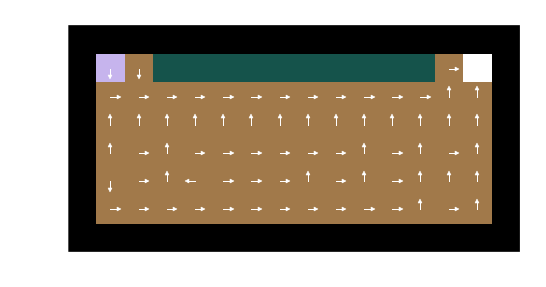

In [13]:
# plot the world
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(world, cmap=cm.cubehelix, interpolation='nearest')

# Show the policy that's greedy w.r.t. Q now
policy = np.argmax(Q,2)
markers = ['^','v','>','<']
xoff = 0.3*np.array([0,0,1,-1])
yoff = 0.3*np.array([-1,1,0,0])
for r in range(numrows):
    for c in range(numcols):
        if world[r,c] not in (RESTART,WALL,GOAL):
            i = policy[r,c]
            plt.plot([c,c+xoff[i]],[r,r+yoff[i]],'-w') # to make an arrow...!
            plt.plot([c+xoff[i]],[r+yoff[i]],marker=markers[i],
                     markerfacecolor='w',markeredgecolor='w',markersize=4)
plt.axis('off')
plt.show()